In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_March23.csv


In [2]:
import pandas as pd

# Load the US Accidents dataset
data = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')  # Adjust the path to where your dataset is stored
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
# Select relevant columns for ARM
selected_columns = ['Severity', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Traffic_Signal']

# Drop rows with missing values in the selected columns
data_cleaned = data[selected_columns].dropna()

# Convert categorical variables to binary using one-hot encoding
data_encoded = pd.get_dummies(data_cleaned)

# Display the prepared data
data_encoded.head()


,Severity,Traffic_Signal,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Civil_Twilight_Day,Civil_Twilight_Night,Nautical_Twilight_Day,Nautical_Twilight_Night
0,3,False,False,True,False,True,False,True
1,2,False,False,True,False,True,False,True
2,2,True,False,True,False,True,True,False
3,3,False,False,True,True,False,True,False
4,2,True,True,False,True,False,True,False


In [6]:
# Convert Severity column into binary (low = 0, high = 1)
data['Severity_Binary'] = data['Severity'].apply(lambda x: 1 if x >= 3 else 0)

# Now use the binary severity in your analysis
selected_columns = ['Severity_Binary', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Traffic_Signal']

# Drop rows with missing values in the selected columns
data_cleaned = data[selected_columns].dropna()

# Convert categorical variables to binary using one-hot encoding
data_encoded = pd.get_dummies(data_cleaned)

# Display the prepared data
data_encoded.head()


,Severity_Binary,Traffic_Signal,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Civil_Twilight_Day,Civil_Twilight_Night,Nautical_Twilight_Day,Nautical_Twilight_Night
0,1,False,False,True,False,True,False,True
1,0,False,False,True,False,True,False,True
2,0,True,False,True,False,True,True,False
3,1,False,False,True,True,False,True,False
4,0,True,True,False,True,False,True,False


In [7]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apply Apriori algorithm with a minimum support threshold (adjust as needed, e.g., 0.01)
frequent_itemsets = apriori(data_encoded, min_support=0.01, use_colnames=True)

# Generate association rules with a minimum confidence threshold (e.g., 0.2)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

# Display the first few rules
rules.head()


/opt/conda/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Severity_Binary),(Sunrise_Sunset_Day),0.194816,0.692336,0.136605,0.701199,1.012801,0.001727,1.029660,0.015697
1,(Severity_Binary),(Sunrise_Sunset_Night),0.194816,0.307664,0.058211,0.298801,0.971195,-0.001727,0.987361,-0.035527
2,(Severity_Binary),(Civil_Twilight_Day),0.194816,0.739197,0.145898,0.748905,1.013133,0.001891,1.038663,0.016100
3,(Severity_Binary),(Civil_Twilight_Night),0.194816,0.260803,0.048917,0.251095,0.962776,-0.001891,0.987037,-0.045818
4,(Severity_Binary),(Nautical_Twilight_Day),0.194816,0.788584,0.155684,0.799133,1.013377,0.002055,1.052518,0.016395


In [8]:
# Top 15 rules by support
top_15_support = rules.sort_values(by='support', ascending=False).head(15)

# Top 15 rules by confidence
top_15_confidence = rules.sort_values(by='confidence', ascending=False).head(15)

# Top 15 rules by lift
top_15_lift = rules.sort_values(by='lift', ascending=False).head(15)

# Display the top rules
print("Top 15 Rules by Support:")
print(top_15_support)

print("\nTop 15 Rules by Confidence:")
print(top_15_confidence)

print("\nTop 15 Rules by Lift:")
print(top_15_lift)


Top 15 Rules by Support:
                                        antecedents  \
21                          (Nautical_Twilight_Day)   
20                             (Civil_Twilight_Day)   
13                             (Sunrise_Sunset_Day)   
14                          (Nautical_Twilight_Day)   
63         (Civil_Twilight_Day, Sunrise_Sunset_Day)   
64      (Civil_Twilight_Day, Nautical_Twilight_Day)   
65      (Sunrise_Sunset_Day, Nautical_Twilight_Day)   
66                             (Civil_Twilight_Day)   
67                             (Sunrise_Sunset_Day)   
68                          (Nautical_Twilight_Day)   
11                             (Civil_Twilight_Day)   
12                             (Sunrise_Sunset_Day)   
16                           (Civil_Twilight_Night)   
15                           (Sunrise_Sunset_Night)   
73  (Sunrise_Sunset_Night, Nautical_Twilight_Night)   

                                    consequents  antecedent support  \
21                     

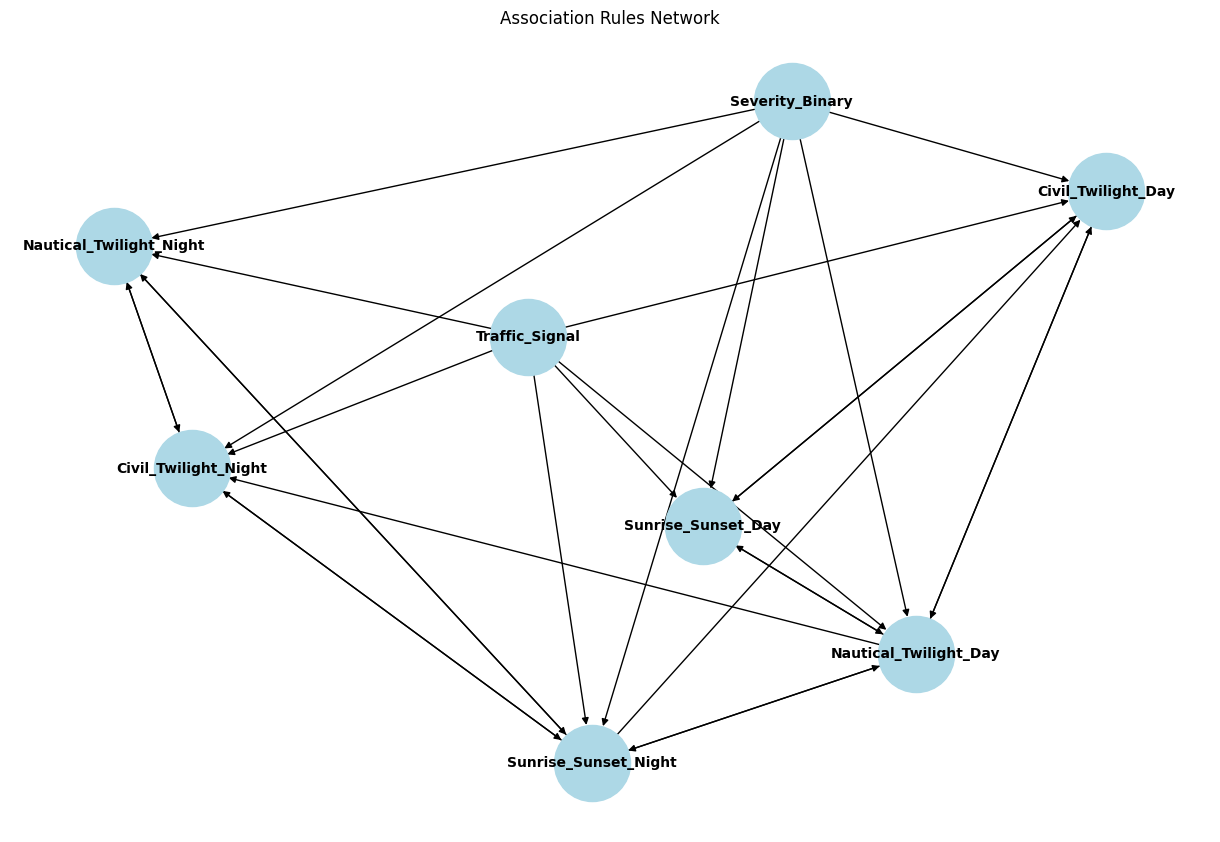

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges based on the antecedents and consequents of the rules
for i, rule in rules.iterrows():
    for antecedent in rule['antecedents']:
        for consequent in rule['consequents']:
            G.add_edge(antecedent, consequent, weight=rule['confidence'])

# Draw the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=1.5)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight="bold")
plt.title('Association Rules Network')
plt.show()
